# MACHINE LEARNING - CLASSIFICAÇÃO

**Informações sobre o data set**

- **Loan_ID**: ID de empréstimo exclusivo.
- **Gender**: Gênero (masculino / feminino).
- **Married**: Casado (sim) ou Não casado (Não).
- **Dependents**: Número de pessoas dependendo do cliente.
- **Education**: Educação do Candidato (Graduado ou Não Graduado).
- **Self_Employed**: Autônomo (Sim/Não).
- **ApplicantIncome**: Renda do candidato.
- **CoapplicantIncome**: Renda do co-requerente.
- **LoanAmount**: Valor do empréstimo em milhares.
- **Loan_Amount_Term**: Prazos do empréstimo em meses.
- **Credit_History**: Se o histórico de crédito atende às diretrizes (Sim ou Não)
- **Property_Area**: Local de residência dos candidatos (zona urbana, semi-urbana ou rural)
- **Loan_Status**: Empréstimo aprovado (S/N).

## Análise Exploratória dos dados

In [1]:
# Importação dos pacotes para importação, manipulação e visualização dos dados
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Carregamento dos pacotes para pré processamento e machine learning
from sklearn.model_selection import train_test_split # Divisão dos dados em treino e teste
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler # Normalização
from sklearn.preprocessing import LabelEncoder # Label Encoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Importação do dataset
df = pd.read_csv('C:\\Users\\glaub.LAPTOP-I72D4AH6\\Documents\\Scripts_Python\\loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
# Verificando a dimensão dos dados
df.shape

(381, 13)

In [5]:
# Vendo informações gerais do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
# Checando duplicidade de valores
df.duplicated().sum()

0

In [7]:
# Verificando valores ausentes do df
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Há mais pessoas que tiveram empréstimos aprovados do que pessoas que não tiveram empréstimo aprovado
df['Loan_Status'].value_counts()

Loan_Status
Y    271
N    110
Name: count, dtype: int64

In [9]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [10]:
df.groupby('Loan_Amount_Term').size()

Loan_Amount_Term
12.0       1
36.0       1
60.0       1
84.0       3
120.0      3
180.0     29
240.0      2
300.0      7
360.0    312
480.0     11
dtype: int64

In [11]:
# Verificando resumo estatístico
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [85]:
# Variáveis numéricas do data frame
col_num = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

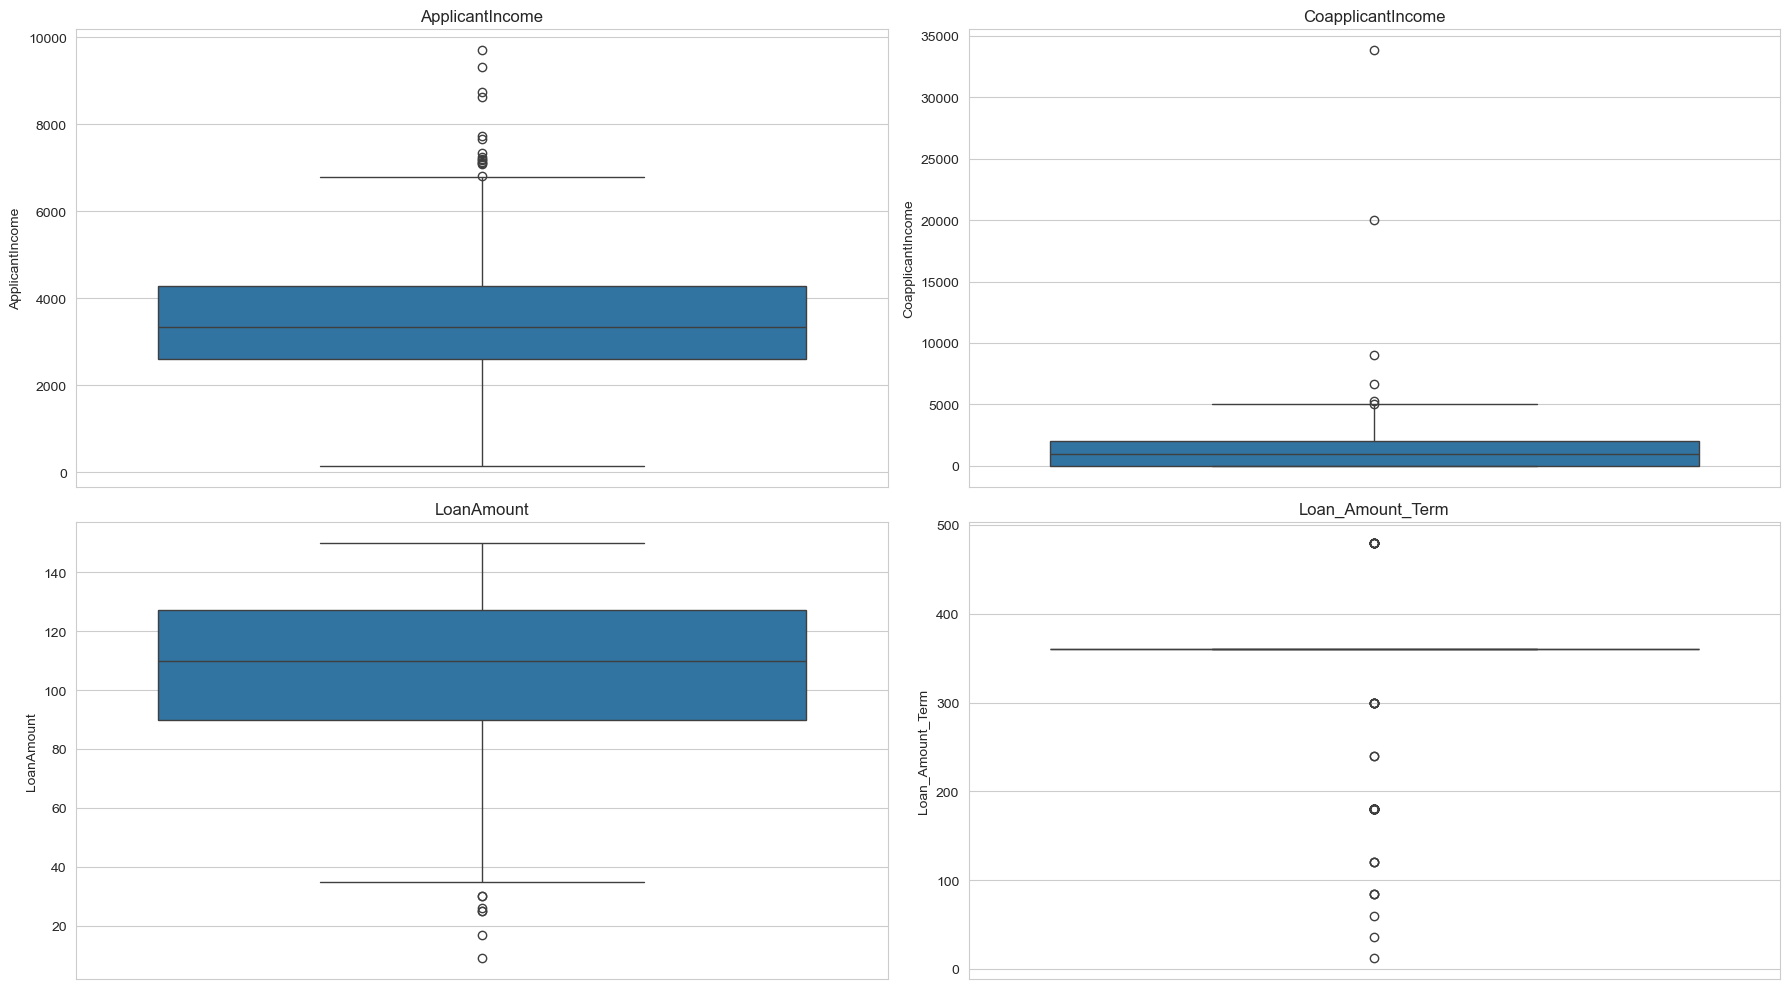

In [86]:
# Verificando o boxplot das variáveis numéricas
fig, axes = mpl.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(col_num):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(f'{column}')

mpl.tight_layout()
mpl.show()

---

## Pré Processamento dos dados

In [13]:
# Criando uma cópia do dt original
df_1 = df.copy()

In [14]:
# Excluindo valores ausentes do dataset
df_1.dropna(inplace = True)

In [15]:
# Convertendo a coluna Credit_History em object (string)
df_1['Credit_History'] = df_1['Credit_History'].astype(str)

In [16]:
# Verificando as linhas que serão removidas do data frame (Tratamento de Outlier)
df_1[df_1['CoapplicantIncome'] > 15000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
256,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
364,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N


In [17]:
# Removendo os outliers da coluna CoapplicantIncome
df_1 = df_1.drop(df_1[df_1['CoapplicantIncome'] > 15000].index)

In [19]:
# Substituindo os valores do campo "Dependents" (0 ou 1)
df_1.loc[df_1['Dependents'] != "0", 'Dependents'] = "1"

In [22]:
# Criando faixa de prazos de emprestimo para utilizarmos no modelo preditivo
bins = [-100, 120, 300, 500]
labels = ['Até 120 Meses', '121 até 300 Meses', '301 até 480 Meses']
df_1['FAIXA_PRAZO_EMPRESTIMO'] = pd.cut(df_1['Loan_Amount_Term'], bins=bins, labels=labels)
pd.value_counts(df_1.FAIXA_PRAZO_EMPRESTIMO)

FAIXA_PRAZO_EMPRESTIMO
301 até 480 Meses    267
121 até 300 Meses     32
Até 120 Meses          7
Name: count, dtype: int64

In [24]:
columns = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Property_Area', 'Loan_Status',
       'FAIXA_PRAZO_EMPRESTIMO']
df_2 = pd.DataFrame(df_1, columns = columns)

In [25]:
df_2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,FAIXA_PRAZO_EMPRESTIMO
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,301 até 480 Meses
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,301 até 480 Meses
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,301 até 480 Meses
3,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,301 até 480 Meses
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,1.0,Urban,Y,301 até 480 Meses


In [26]:
# Separando o data frame em variáveis categóricas e numéricas
categoricas = []
numericas = []
for i in df_2.columns.to_list():
    if df_2.dtypes[i] == 'int64' or df_2.dtypes[i] == 'float64':
        numericas.append(i)
    else:
        categoricas.append(i)

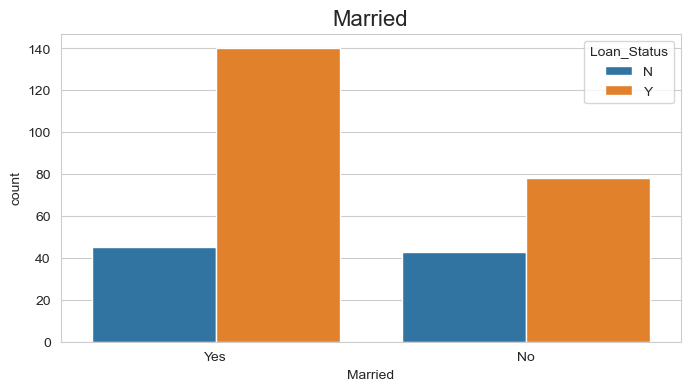

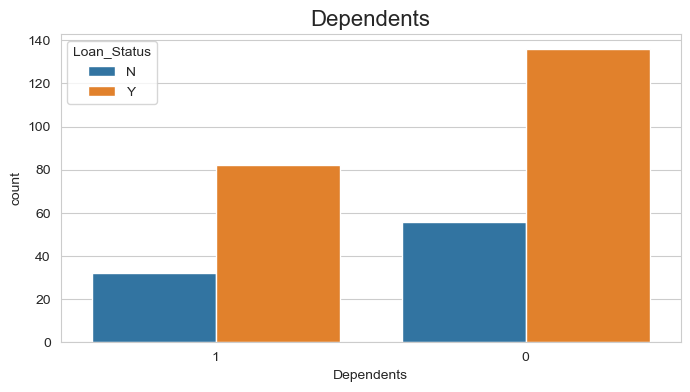

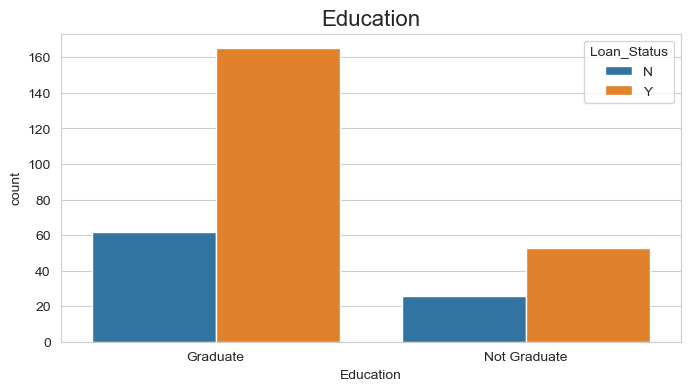

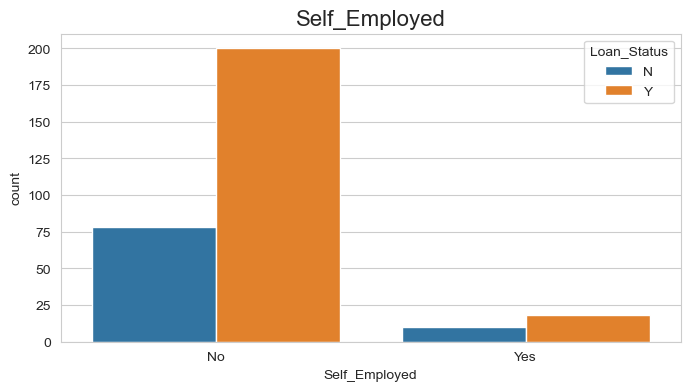

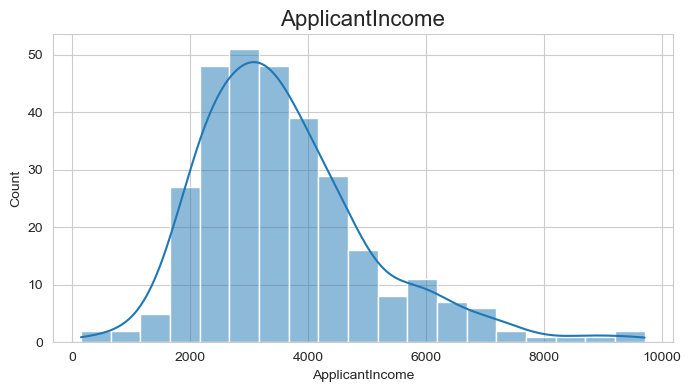

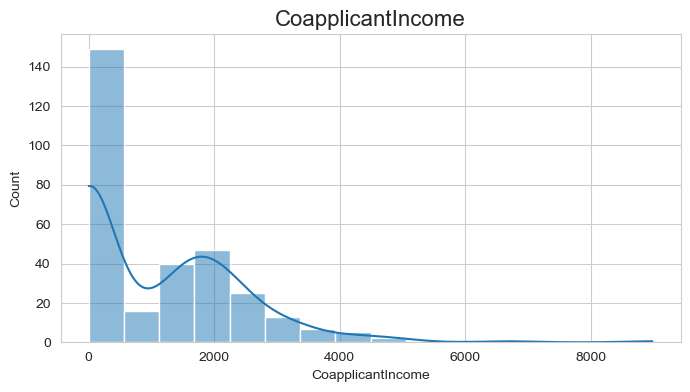

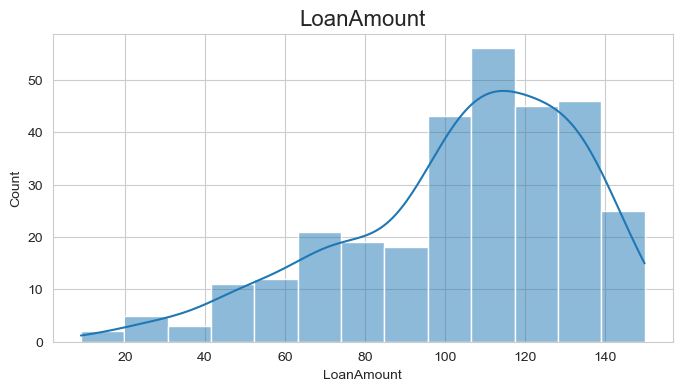

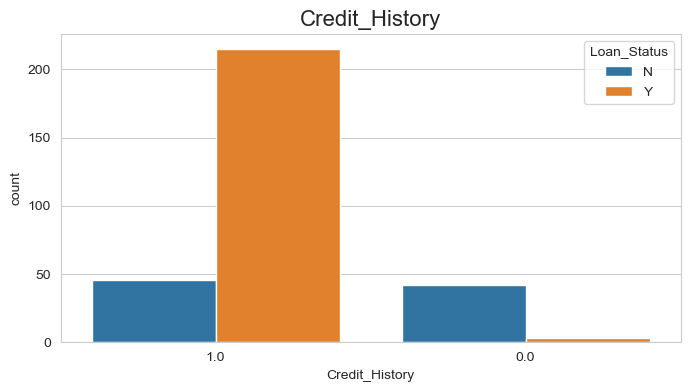

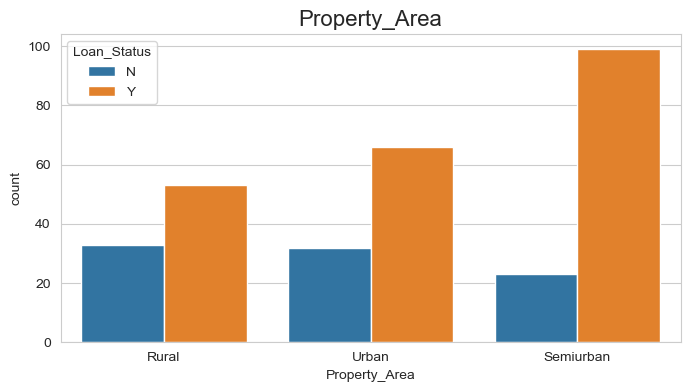

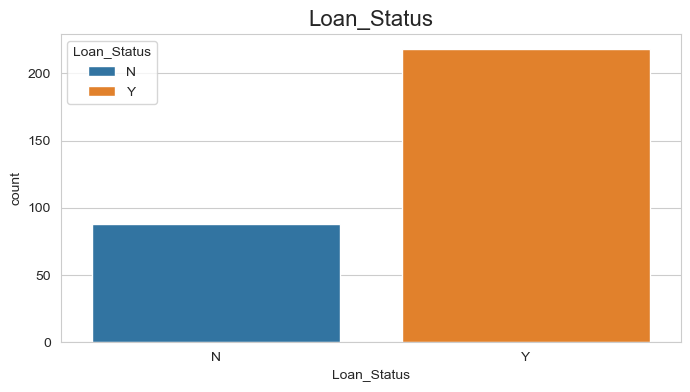

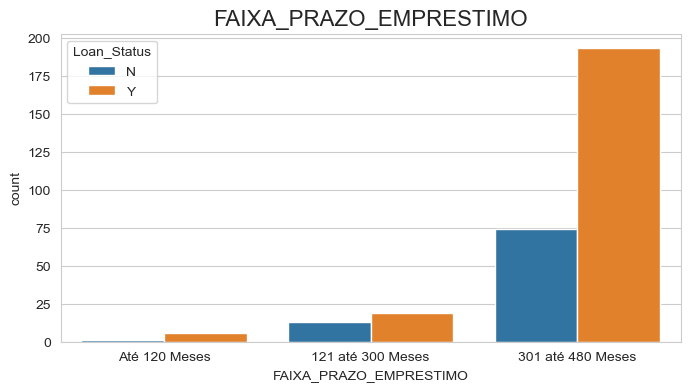

In [27]:
# Gráficos
for c in df_2.columns[1:13]:
    mpl.figure(figsize = (8,4))
    mpl.title(c, fontsize = 16)
    if c in categoricas:
        sns.countplot(x = df_2[c], hue = df['Loan_Status'])
    if c in numericas:
        sns.histplot(df_2[c], kde = True, )

In [28]:
# aplicando o Label Encoder nas variáveis categoricas
lb = LabelEncoder()
for var in categoricas:
    df_2[var] = lb.fit_transform(df_2[var])

---

## Modelos

In [62]:
# Função
def relatorio_ml_norm(df, algoritmo, opt = 2):
    X = df.drop(['Loan_Status'], axis= 1)
    y = df['Loan_Status']
    
    # Dividindo os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print(f"\nQuantidade de registros de treino: {X_train.shape[0]}")
    print(f"\nQuantidade de registros de teste: {X_test.shape[0]}")
    
    # Padronizando os dados
    normalizador = MinMaxScaler()
    X_train = normalizador.fit_transform(X_train)
    X_test = normalizador.transform(X_test)
    
    ml = algoritmo()
        
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"\nAcurácia treino: {score_train*100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"\nAcurácia teste: {score_test*100:.2f}%")
    
    y_previsto = ml.predict(X_test)
    print('\n--- CLASSIFICATION REPORT ---')
    print(classification_report(y_test, y_previsto))
    print('--- CONFUSION MATRIX ---')
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Blues')
    
    return score_train, score_test


Quantidade de registros de treino: 214

Quantidade de registros de teste: 92

Acurácia treino: 85.51%

Acurácia teste: 80.43%

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.87      0.45      0.59        29
           1       0.79      0.97      0.87        63

    accuracy                           0.80        92
   macro avg       0.83      0.71      0.73        92
weighted avg       0.82      0.80      0.78        92

--- CONFUSION MATRIX ---


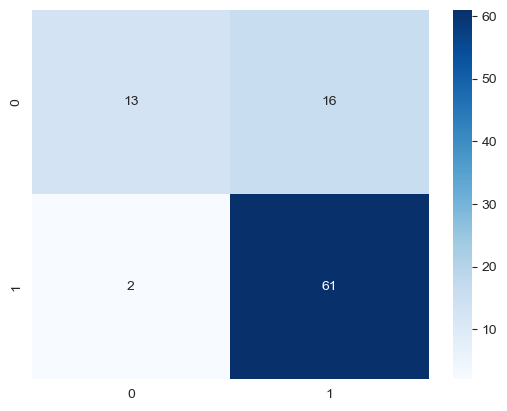

In [63]:
# Regressão Logística
log_train_norm, log_test_norm = relatorio_ml_norm(df_2, LogisticRegression)


Quantidade de registros de treino: 214

Quantidade de registros de teste: 92

Acurácia treino: 100.00%

Acurácia teste: 70.65%

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.55      0.38      0.45        29
           1       0.75      0.86      0.80        63

    accuracy                           0.71        92
   macro avg       0.65      0.62      0.62        92
weighted avg       0.69      0.71      0.69        92

--- CONFUSION MATRIX ---


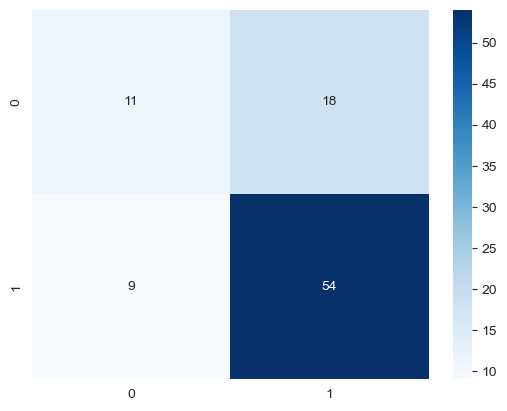

In [64]:
# Árvore de Decisão
tree_train_norm, tree_test_norm = relatorio_ml_norm(df_2, DecisionTreeClassifier)


Quantidade de registros de treino: 214

Quantidade de registros de teste: 92

Acurácia treino: 90.65%

Acurácia teste: 78.26%

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.71      0.52      0.60        29
           1       0.80      0.90      0.85        63

    accuracy                           0.78        92
   macro avg       0.76      0.71      0.73        92
weighted avg       0.77      0.78      0.77        92

--- CONFUSION MATRIX ---


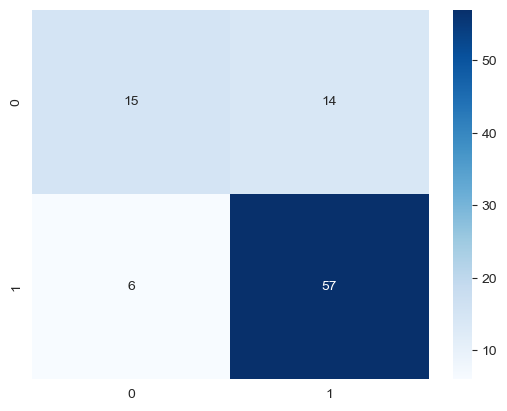

In [65]:
# Ada Boost
ada_train_norm, ada_test_norm = relatorio_ml_norm(df_2,AdaBoostClassifier)


Quantidade de registros de treino: 214

Quantidade de registros de teste: 92

Acurácia treino: 86.92%

Acurácia teste: 72.83%

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.62      0.34      0.44        29
           1       0.75      0.90      0.82        63

    accuracy                           0.73        92
   macro avg       0.69      0.62      0.63        92
weighted avg       0.71      0.73      0.70        92

--- CONFUSION MATRIX ---


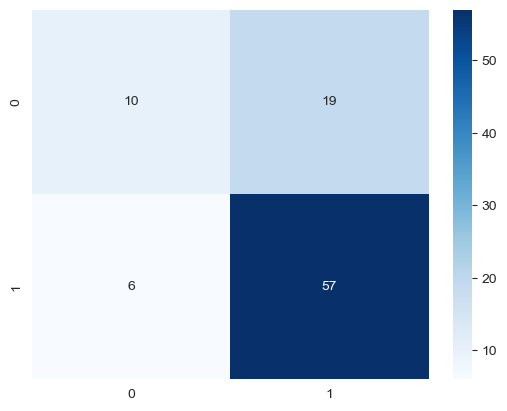

In [66]:
# K Neighbors
kn_train_norm, kn_test_norm = relatorio_ml_norm(df_2, KNeighborsClassifier)


Quantidade de registros de treino: 214

Quantidade de registros de teste: 92

Acurácia treino: 100.00%

Acurácia teste: 77.17%

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.72      0.45      0.55        29
           1       0.78      0.92      0.85        63

    accuracy                           0.77        92
   macro avg       0.75      0.68      0.70        92
weighted avg       0.76      0.77      0.75        92

--- CONFUSION MATRIX ---


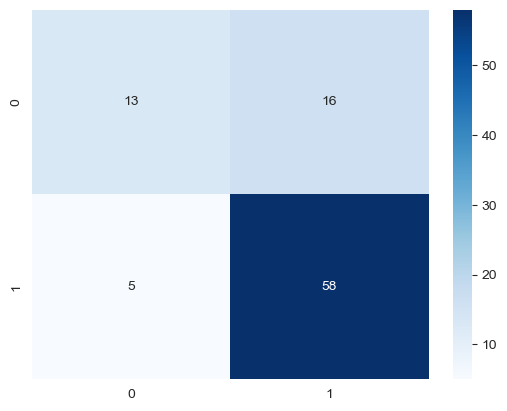

In [67]:
# Random Forest
rand_train_norm, rand_test_norm = relatorio_ml_norm(df_2, RandomForestClassifier)

In [68]:
# Criando uma tabela com os resultados dos modelos

data_norm = { 
'Models' : ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest', 'Ada Boost'],
'Acurácia treino' : [round(log_train_norm * 100, 2), round(tree_train_norm * 100, 2), round(kn_train_norm * 100, 2), round(rand_train_norm * 100, 2), round(ada_train_norm * 100, 2)],
'Acurácia teste' : [round(log_test_norm * 100, 2), round(tree_test_norm * 100, 2), round(kn_test_norm * 100, 2), round(rand_test_norm * 100, 2), round(ada_test_norm * 100, 2)]
}
df_norm = pd.DataFrame(data_norm)
df_norm.sort_values(by = 'Acurácia teste', ascending= False, inplace = True)
df_norm

,Models,Acurácia treino,Acurácia teste
0,Logistic Regression,85.51,80.43
4,Ada Boost,90.65,78.26
3,Random Forest,100.00,77.17
2,KNeighbors,86.92,72.83
1,Decision Tree,100.00,70.65
